<a href="https://colab.research.google.com/github/Prodipto-98/MACHINE-LEARNING/blob/main/RAGA_IDENTIFICATION_USING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip smalldataset.zip


Archive:  smalldataset.zip
   creating: archive (1)/
   creating: archive (1)/asavari/
  inflating: archive (1)/asavari/asavari25.wav  
  inflating: archive (1)/asavari/asavari26.wav  
  inflating: archive (1)/asavari/asavari27.wav  
  inflating: archive (1)/asavari/asavari28.wav  
  inflating: archive (1)/asavari/asavari29.wav  
   creating: archive (1)/bageshree/
  inflating: archive (1)/bageshree/bageshree27.wav  
  inflating: archive (1)/bageshree/bageshree28.wav  
  inflating: archive (1)/bageshree/bageshree29.wav  
  inflating: archive (1)/bageshree/bageshree30.wav  
  inflating: archive (1)/bageshree/bageshree31.wav  
   creating: archive (1)/bhairavi/
  inflating: archive (1)/bhairavi/bhairavi27.wav  
  inflating: archive (1)/bhairavi/bhairavi28.wav  
  inflating: archive (1)/bhairavi/bhairavi29.wav  
  inflating: archive (1)/bhairavi/bhairavi30.wav  
  inflating: archive (1)/bhairavi/bhairavi31.wav  
   creating: archive (1)/bhoop/
  inflating: archive (1)/bhoop/bhoop01.wav  


In [2]:
pip install tensorflow-io


In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [4]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
# pip uninstall tensorflow-io
!pip install tensorflow-io


In [6]:
Dkanda=os.path.join(r"/content/archive (1)/Dkanada/DKanada01.wav")

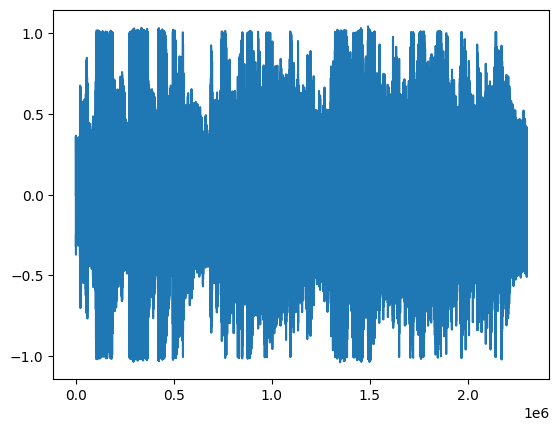

In [7]:
wave = load_wav_16k_mono(Dkanda)
plt.plot(wave)
plt.show()

In [8]:
Dkanada = os.path.join("/content/archive (1)/Dkanada")
asavari = os.path.join("/content/archive (1)/asavari")
bageshree = os.path.join("/content/archive (1)/bageshree")
bhairavi = os.path.join("/content/archive (1)/bhairavi")
bhoop = os.path.join("/content/archive (1)/bhoop")
bhoopali = os.path.join("/content/archive (1)/bhoopali")
darbari = os.path.join("/content/archive (1)/darbari")
malkauns = os.path.join("/content/archive (1)/malkauns")
sarang = os.path.join("/content/archive (1)/sarang")
yaman = os.path.join("/content/archive (1)/yaman")

In [9]:
Dkanada = os.path.join(Dkanada+'/*.wav')
asavari = os.path.join(asavari+'/*.wav')
bageshree = os.path.join(bageshree+'/*.wav')
bhairavi = os.path.join(bhairavi+'/*.wav')
bhoop = os.path.join(bhoop+'/*.wav')
bhoopali = os.path.join(bhoopali+'/*.wav')
darbari = os.path.join(darbari+'/*.wav')
malkauns = os.path.join(malkauns+'/*.wav')
sarang = os.path.join(sarang+'/*.wav')
yaman = os.path.join(yaman+'/*.wav')

In [10]:
Dkanada_files = tf.data.Dataset.list_files(Dkanada)
asavari_files = tf.data.Dataset.list_files(asavari)
bageshree_files = tf.data.Dataset.list_files(bageshree)
bhairavi_files = tf.data.Dataset.list_files(bhairavi)
bhoop_files = tf.data.Dataset.list_files(bhoop)
bhoopali_files = tf.data.Dataset.list_files(bhoopali)
darbari_files = tf.data.Dataset.list_files(darbari)
malkauns_files = tf.data.Dataset.list_files(malkauns)
sarang_files = tf.data.Dataset.list_files(sarang )
yaman_files= tf.data.Dataset.list_files(yaman)

In [11]:
dkanada_data = tf.data.Dataset.zip((Dkanada_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(Dkanada_files), 0))))
asavari_data =tf.data.Dataset.zip((asavari_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(asavari_files), 1))))
bageshree_data = tf.data.Dataset.zip((bageshree_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(bageshree_files), 2))))
bhairavi_data = tf.data.Dataset.zip((bhairavi_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(bhairavi_files), 3))))
bhoop_data = tf.data.Dataset.zip((bhoop_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(bhoop_files), 4))))
bhoopali_data = tf.data.Dataset.zip((bhoopali_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(bhoopali_files), 5))))
darbari_data = tf.data.Dataset.zip((darbari_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(darbari_files), 6))))
malkauns_data = tf.data.Dataset.zip((malkauns_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(malkauns_files), 7))))
sarang_data = tf.data.Dataset.zip((sarang_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(sarang_files), 8))))
yaman_data = tf.data.Dataset.zip((yaman_files, tf.data.Dataset.from_tensor_slices(tf.fill(len(yaman_files), 9))))

In [12]:
data = dkanada_data.concatenate(asavari_data).concatenate(bageshree_data).concatenate(bhairavi_data).concatenate(bhoop_data).concatenate(bhoopali_data).concatenate(darbari_data).concatenate(malkauns_data).concatenate(sarang_data).concatenate(yaman_data)


In [13]:
data.shuffle(500).as_numpy_iterator().next()

(b'/content/archive (1)/bhoopali/bhoopali23.wav', 5)

In [14]:
lengths = []
for file in os.listdir(os.path.join("/content/archive (1)/asavari")):
    tensor_wave = load_wav_16k_mono(os.path.join("/content/archive (1)/asavari", file))
    lengths.append(len(tensor_wave))

In [15]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [16]:
filepath, label = dkanada_data .shuffle(buffer_size=10000).as_numpy_iterator().next()

In [17]:
filepath=b'/content/archive (1)/asavari/asavari25.wav'

In [18]:
spectrogram, label = preprocess(filepath, 1)

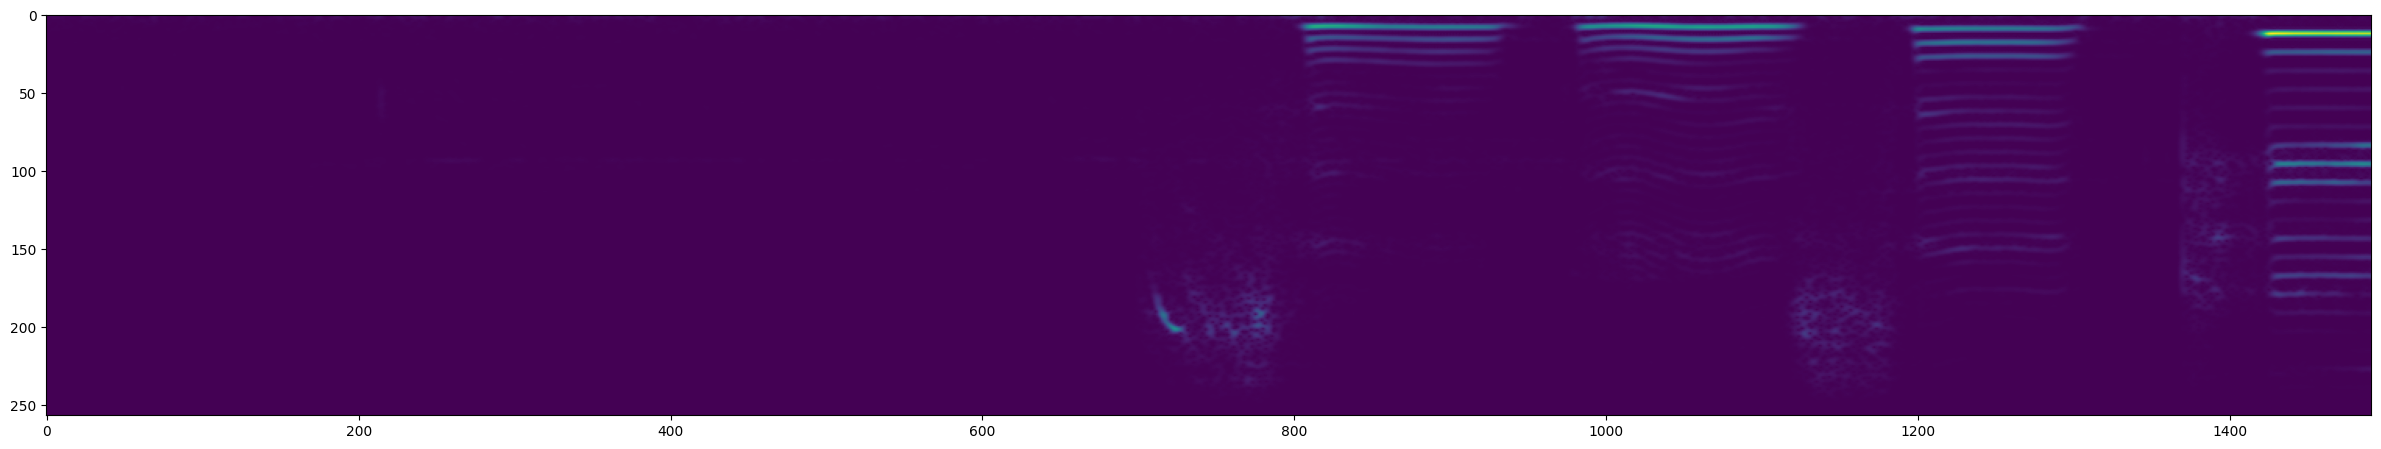

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [20]:
data.as_numpy_iterator().next()

(b'/content/archive (1)/Dkanada/DKanada04.wav', 0)

In [21]:
data = data.map(preprocess)

import numpy as np
len(data)


50

In [22]:
train = data.take(35)
test = data.skip(35).take(15)

In [27]:
samples, labels = train.as_numpy_iterator().next()

In [28]:
samples.shape

(1491, 257, 1)

In [26]:
import numpy as np
num_elements_to_display = 50
sample_data = data.take(num_elements_to_display)

X = []  # To store spectrograms
y = []  # To store labels

numpy_iterator = sample_data.as_numpy_iterator()

# Iterate through the elements and store the spectrograms and labels
for i, (spectrogram, label) in enumerate(numpy_iterator):
    # Append the spectrogram to X
    X.append(spectrogram)

    # Append the label to y
    y.append(label)

    # Visualization using Matplotlib
    # plt.imshow(np.squeeze(spectrogram), cmap='viridis', origin='lower', aspect='auto')
    # plt.title(f"Example {i + 1} - Label: {label}")
    # plt.show()

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Check the shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (50, 1491, 257, 1)
y shape: (50,)


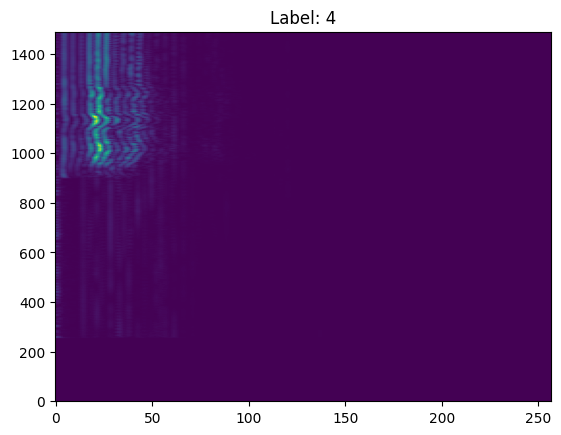

In [29]:
plt.imshow(np.squeeze(X[49]), cmap='viridis', origin='lower', aspect='auto')
plt.title(f"Label: {y[20]}")
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import numpy as np

# Assuming X contains spectrograms/images and y contains labels
# Ensure that X is normalized before training (e.g., X = X / 255.0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 1489, 255, 16)       │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 1487, 253, 32)       │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 743, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 741, 124, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2940288)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │      94,089,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,103,626 (358.98 MB)

 Trainable params: 94,103,626 (358.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 12s/step - accuracy: 0.0813 - loss: 4.8192 - val_accuracy: 0.2000 - val_loss: 9.4110
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 38s 10s/step - accuracy: 0.4313 - loss: 2.7561 - val_accuracy: 0.5000 - val_loss: 9.5976
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.7771 - loss: 1.4741 - val_accuracy: 0.9000 - val_loss: 0.8794
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.9292 - loss: 0.4244 - val_accuracy: 0.9000 - val_loss: 0.7888
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.9187 - loss: 0.3545 - val_accuracy: 0.7000 - val_loss: 1.3014
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.9833 - loss: 0.1507 - val_accuracy: 0.6000 - val_loss: 1.6822
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.9833 - loss: 0.0765 - val_accuracy: 0.9000 - val_loss: 0.8226
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 1.0000 - loss: 0.0359 - val_accuracy: 0.8000 - val_loss: 1.0658


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 3.8419
Test Accuracy: 70.00%


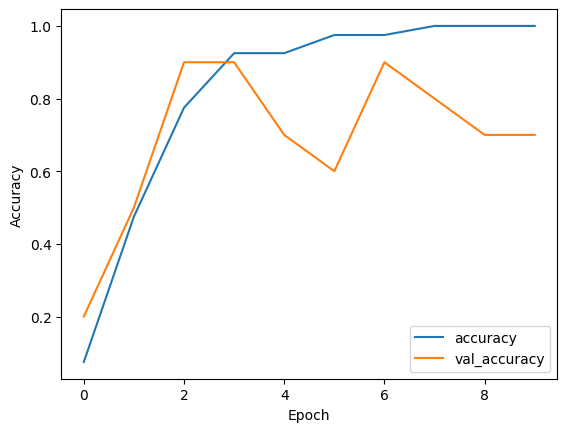

In [43]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 3.8419


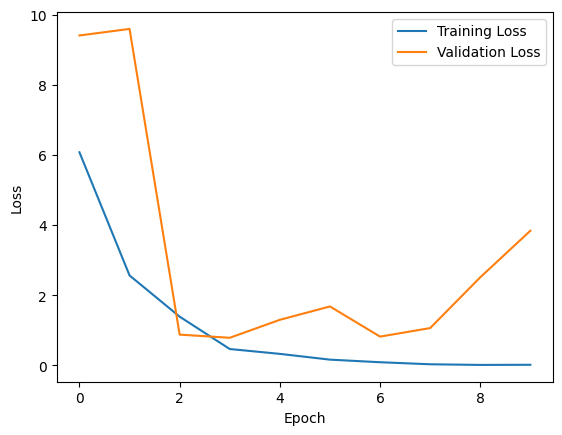

In [44]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()